# **Universidad Nacional de Rosario - Facultad de Ciencias Exactas, Ingeniería y Agrimensura.**

Tecnicatura Universitaria en Inteligencia Artificial.

Procesamiento del Lenguaje Natural: Trabajo Práctico N°1 Parte 1

Juego: Cascadia.

*Integrantes:*

Agustín Arenas, Daniela Dito, Santiago Giaveno, Brisa Moresco

# **PARTE 1: ESTADISTICAS**

En esta sección recolectamos datos estadísticos de la pagina del juego, estara dividido en:

-GENERALES: Juego y resumen de otros

-RATINGS: Clasificación de los puntajes

-FORO: Divisón por tematicas

-DISEÑADOR: Diferentes roles del mismo

## SETUP ACTUALIZADO DE SELENIUM + CHROMEDRIVER EN COLAB

In [1]:
# Setup previo para Google Colab (instalar y configurar Selenium + ChromeDriver)
# !apt update > /dev/null                          # Actualizo versiones y elimino salidas
!apt install chromium-chromedriver > /dev/       #  controlar Chromium desde código Python (vía Selenium).
!cp /usr/lib/chromium-browser/chromedriver /usr/bin  # ubicación original del ejecutable.
!pip install selenium > /dev/null                # /usr/bin: carpeta del PATH, para ejecutar chromedriver sin especificar la ruta completa. #  Instala la librería de Selenium en el entorno de Python

import warnings
warnings.filterwarnings('ignore')

/bin/bash: line 1: /dev/: Is a directory
cp: cannot stat '/usr/lib/chromium-browser/chromedriver': No such file or directory


In [2]:
#Configura Selenium para usar el navegador headless
#Configuramos el entorno
import sys
import warnings
warnings.filterwarnings("ignore")

#Aseguramos que esté en el path correcto
sys.path.insert(0, '/usr/lib/chromium-browser/')


In [3]:
# Importamos librerias necesarias para este módulo
import pandas as pd
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time

import matplotlib.pyplot as plt

Funcion para detectar automáticamente si estás en Google Colab o en tu máquina local, y ajusta la ruta al chromedriver en consecuencia:

In [4]:
import os
import platform
import shutil
import sys

def iniciar_driver():
    opciones = Options()
    opciones.add_argument('--headless')
    opciones.add_argument('--no-sandbox')
    opciones.add_argument('--disable-dev-shm-usage')
    opciones.add_argument('--disable-gpu')
    opciones.add_argument('--window-size=1920x1080')

    # Detecta si estás en Google Colab
    en_colab = 'COLAB_GPU' in os.environ

    if en_colab:
        chromedriver_path = '/usr/bin/chromedriver'
    else:
        if platform.system() == 'Windows':
            # Intenta buscar automáticamente el ejecutable si está en el PATH
            chromedriver_path = shutil.which("chromedriver")
            if not chromedriver_path:
                # Ruta personalizada si no se encuentra en el PATH
                chromedriver_path = 'C:/chromedriver/chromedriver.exe'
        else:
            # Linux/Mac
            chromedriver_path = shutil.which("chromedriver")
            if not chromedriver_path:
                chromedriver_path = '/usr/local/bin/chromedriver'

    # Verifica que el archivo exista
    if not os.path.exists(chromedriver_path):
        print(f"❌ No se encontró chromedriver en: {chromedriver_path}")
        print("💡 Asegúrate de que esté instalado o agrega su ruta manualmente.")
        sys.exit(1)

    # Inicia el navegador
    #service = Service('/usr/bin/chromedriver')   # Configurar la ruta del driver
    service = Service(chromedriver_path)
    driver = webdriver.Chrome(service=service, options=opciones)
    return driver


## **ESTADISTICA:** GENERALES

In [5]:
def estadisticas_juego(url):
    '''
    Descripción:
    Recoge estadísticas y valores de una página web utilizando Selenium, extrayendo información relevante sobre estadísticas de juegos
    y jugadores a partir de elementos HTML específicos.
    '''

    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-gpu')

    # Configurar la ruta del driver
    service = Service('/usr/bin/chromedriver')
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)
    resultados = []

    try:
        WebDriverWait(driver, 10).until(EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'li.outline-item')))

        items = driver.find_elements(By.CSS_SELECTOR, 'li.outline-item')

        for item in items:
            try:
                entidad = item.find_element(By.CSS_SELECTOR, 'div.outline-item-title').text.strip()

                if entidad == 'All time Plays':
                    entidad = 'Total of players'
                elif entidad == 'This Month':
                    entidad = 'Players this Month'
                elif entidad == 'Own':
                    entidad = 'Players who own the game'
                elif entidad == 'Prev. Owned':
                    entidad = 'Players who owned the game before but not now'
                elif entidad == 'For Trade':
                    entidad = 'Players who have the game for trade'
                elif entidad == 'Want In Trade':
                    entidad = 'Players who want the game in trade'
                elif entidad == 'Wishlist':
                    entidad = 'Players who have the game in their wishlist'
                elif entidad == 'Has Parts':
                    entidad = 'Players who have parts of the game'
                elif entidad == 'Want Parts':
                    entidad = 'Players who want parts of the game'

                # Selector general para cualquier clase que comience con "outline-item-description"
                valor = item.find_element(By.CSS_SELECTOR, 'div[class^="outline-item-description"]').text.strip()

                resultados.append({'Entidad': entidad, 'Valor': valor})
            except Exception:
                pass
    except Exception as e:
        print(f"Error al esperar elementos: {e}")

    finally:
        driver.quit()

    return resultados


In [6]:
# Ejecutamos la recolección de datos
url_stats = 'https://boardgamegeek.com/boardgame/295947/cascadia/stats'
est_juego = estadisticas_juego(url_stats)

In [7]:
# Observamos las estadisticas Generales
print("ESTADISTICAS GENERALES")

df_est_juego = pd.DataFrame(est_juego)
print("Cantidad de estadísticas: ", df_est_juego.shape[0])
df_est_juego

ESTADISTICAS GENERALES
Cantidad de estadísticas:  19


,Entidad,Valor
0,Avg. Rating,7.918
1,No. of Ratings,"47,066"
2,Std. Deviation,1.13
3,Weight,1.85 / 5
4,Comments,"5,924"
5,Fans,"4,548"
6,Page Views,"2,613,812"
7,Overall Rank,52\nHistorical Rank
8,Abstract Rank,1\nHistorical Rank
9,Family Rank,9\nHistorical Rank


In [8]:
df_est_juego

,Entidad,Valor
0,Avg. Rating,7.918
1,No. of Ratings,"47,066"
2,Std. Deviation,1.13
3,Weight,1.85 / 5
4,Comments,"5,924"
5,Fans,"4,548"
6,Page Views,"2,613,812"
7,Overall Rank,52\nHistorical Rank
8,Abstract Rank,1\nHistorical Rank
9,Family Rank,9\nHistorical Rank


In [9]:
# Función para limpiar las filas y extraer solo la parte numérica antes del salto de línea o barra inclinada
def clean_value(value):
    # Asegurarse de que estamos trabajando con una cadena
    if isinstance(value, str):
        # Si hay un salto de línea o barra inclinada, quedarnos solo con la parte numérica antes de estos
        if '\\' in value:
            value = value.split("\\")[0]
        elif '/' in value:
            value = value.split("/")[0]
        elif '\n' in value:
            value = value.split("\n")[0]

        # Eliminar comas de números grandes
        value = value.replace(",", "")

        # Intentar convertirlo a un número (float), si no es posible, retornamos el valor original
        try:
            return float(value)
        except ValueError:
            return value  # Si no se puede convertir, devolvemos el valor sin modificar
    else:
        return value  # Si el valor no es una cadena, lo devolvemos tal cual

# Aplicar la limpieza a la columna 'Valor'
df_est_juego['Valor'] = df_est_juego['Valor'].apply(clean_value)
df_est_juego

,Entidad,Valor
0,Avg. Rating,7.918
1,No. of Ratings,47066.000
2,Std. Deviation,1.130
3,Weight,1.850
4,Comments,5924.000
5,Fans,4548.000
6,Page Views,2613812.000
7,Overall Rank,52.000
8,Abstract Rank,1.000
9,Family Rank,9.000


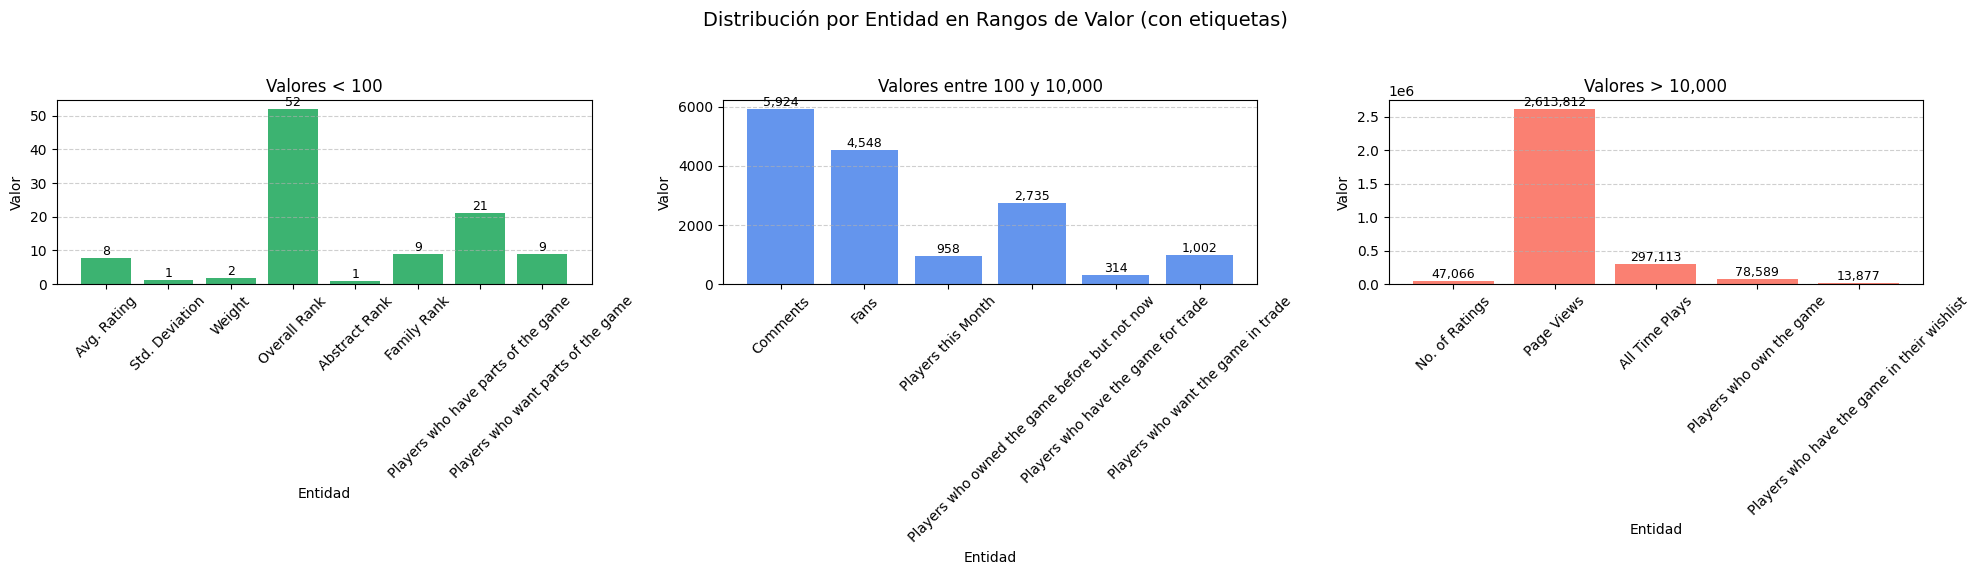

In [10]:
# Crear tres subconjuntos según la magnitud
grupo_a = df_est_juego[df_est_juego['Valor'] < 100]
grupo_b = df_est_juego[(df_est_juego['Valor'] >= 100) & (df_est_juego['Valor'] <= 10000)]
grupo_c = df_est_juego[df_est_juego['Valor'] > 10000]

# Crear subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6), sharey=False)

# Función para agregar etiquetas sobre las barras
def agregar_etiquetas(ax, df):
    for i, v in enumerate(df['Valor']):
        ax.text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontsize=9)

# Grupo A
axes[0].bar(grupo_a['Entidad'], grupo_a['Valor'], color='mediumseagreen')
agregar_etiquetas(axes[0], grupo_a)
axes[0].set_title('Valores < 100')
axes[0].tick_params(axis='x', rotation=45)

# Grupo B
axes[1].bar(grupo_b['Entidad'], grupo_b['Valor'], color='cornflowerblue')
agregar_etiquetas(axes[1], grupo_b)
axes[1].set_title('Valores entre 100 y 10,000')
axes[1].tick_params(axis='x', rotation=45)

# Grupo C
axes[2].bar(grupo_c['Entidad'], grupo_c['Valor'], color='salmon')
agregar_etiquetas(axes[2], grupo_c)
axes[2].set_title('Valores > 10,000')
axes[2].tick_params(axis='x', rotation=45)

# Ajustar diseño
for ax in axes:
    ax.grid(axis='y', linestyle='--', alpha=0.6)
    ax.set_xlabel('Entidad')
    ax.set_ylabel('Valor')

plt.suptitle('Distribución por Entidad en Rangos de Valor (con etiquetas)', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## **ESTADISTICA:** RATINGS

In [11]:
def estadisticas_ratings(url):
    '''
    Extrae la cantidad de votos por puntuación (1 a 10) desde la página de un juego en BGG
    usando Selenium. Respeta la lógica original y es totalmente autónoma.
    '''
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-gpu')

    # Configurar la ruta del driver
    service = Service('/usr/bin/chromedriver')
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)

    resultados = []

    try:
        # Esperar a que se cargue el SVG
        WebDriverWait(driver, 10).until(
            EC.presence_of_element_located((By.CSS_SELECTOR, 'svg'))
        )

        # Extraer textos del eje Y (categorías)
        categorias = driver.find_elements(By.CSS_SELECTOR, 'g > g > text[text-anchor="end"]')
        nombres = [cat.text.strip() for cat in categorias if cat.text.strip() != '']

        # Extraer valores (cantidad) del lado derecho del gráfico
        valores = driver.find_elements(By.CSS_SELECTOR, 'g > g > g > text[text-anchor="start"]')
        cantidades = [val.text.strip() for val in valores if val.text.strip() != '']

        # Unir categorías con cantidades
        for nombre, cantidad in zip(nombres, cantidades):
            resultados.append({'Categoria': nombre, 'Cantidad': cantidad})

    except Exception as e:
        print(f"Error al obtener datos del gráfico SVG: {e}")

    finally:
        driver.quit()

    return resultados

In [12]:
# Ejecutamos la recolección de datos
url_stats = 'https://boardgamegeek.com/boardgame/295947/cascadia/stats'
est_ratings = estadisticas_ratings(url_stats)

In [13]:
# Observamos las estadisticas de Ratings
print("ESTADISTICAS DEL RATINGS")

df_est_ratings = pd.DataFrame(est_ratings)
print("Cantidad de estadísticas: ", df_est_ratings.shape[0])
df_est_ratings

ESTADISTICAS DEL RATINGS
Cantidad de estadísticas:  10


,Categoria,Cantidad
0,1,36
1,2,33
2,3,108
3,4,220
4,5,723
5,6,3.3k
6,7,8.9k
7,8,22k
8,9,8.5k
9,10,3.7k


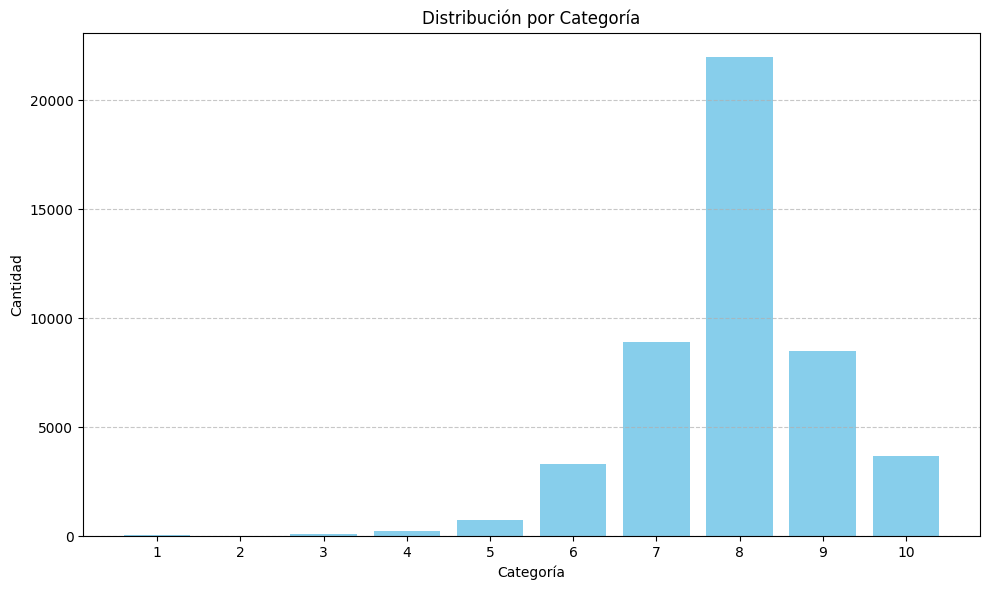

In [14]:
# Conversión de 'k' a número
def convertir_k(valor):
    valor = str(valor).strip().lower()
    if 'k' in valor:
        return float(valor.replace('k', '')) * 1000
    else:
        return float(valor)

df_est_ratings['Cantidad'] = df_est_ratings['Cantidad'].apply(convertir_k)

# Gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_est_ratings['Categoria'], df_est_ratings['Cantidad'], color='skyblue')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Distribución por Categoría')
plt.xticks(df_est_ratings['Categoria'])  # mostrar todos los ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## **ESTADISTICA:** FORO

In [15]:
def estadisticas_foro(url):
    '''
    Extrae categorías del foro desde una página web usando Selenium,
    y devuelve una lista de diccionarios con el nombre de la categoría y su cantidad.
    '''
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-gpu')

    # Configurar la ruta del driver
    service = Service('/usr/bin/chromedriver')
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)

    resultados = []

    try:
        driver.get(url)

        # Esperar a que se cargue la lista de categorías del foro
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'ul.nav.nav-pills.nav-stacked li'))
        )

        items = driver.find_elements(By.CSS_SELECTOR, 'ul.nav.nav-pills.nav-stacked li')

        for item in items:
            try:
                nombre = item.find_element(By.CSS_SELECTOR, 'span.nav-pills-heading').text.strip()
                cantidad = item.find_element(By.CSS_SELECTOR, 'span.nav-pills-count').text.strip()
                resultados.append({'Categoria': nombre, 'Cantidad': cantidad})
            except Exception:
                continue

    except Exception as e:
        print(f"Error al obtener categorías del foro: {e}")

    finally:
        driver.quit()

    return resultados


In [16]:
# Ejecutamos la recolección de datos
url_stats = 'https://boardgamegeek.com/boardgame/295947/cascadia/forums/0'
est_foro = estadisticas_foro(url_stats)

In [17]:
# Observamos las estadisticas del diseñador
print("ESTADISTICAS DEL FORO")

df_est_foro = pd.DataFrame(est_foro)
print("Cantidad de estadísticas: ", df_est_foro.shape[0])
df_est_foro

ESTADISTICAS DEL FORO
Cantidad de estadísticas:  12


,Categoria,Cantidad
0,All,560
1,All,560
2,Reviews,70
3,Sessions,2
4,General,186
5,Rules,217
6,Strategy,8
7,Variants,29
8,News,7
9,Crowdfunding,5


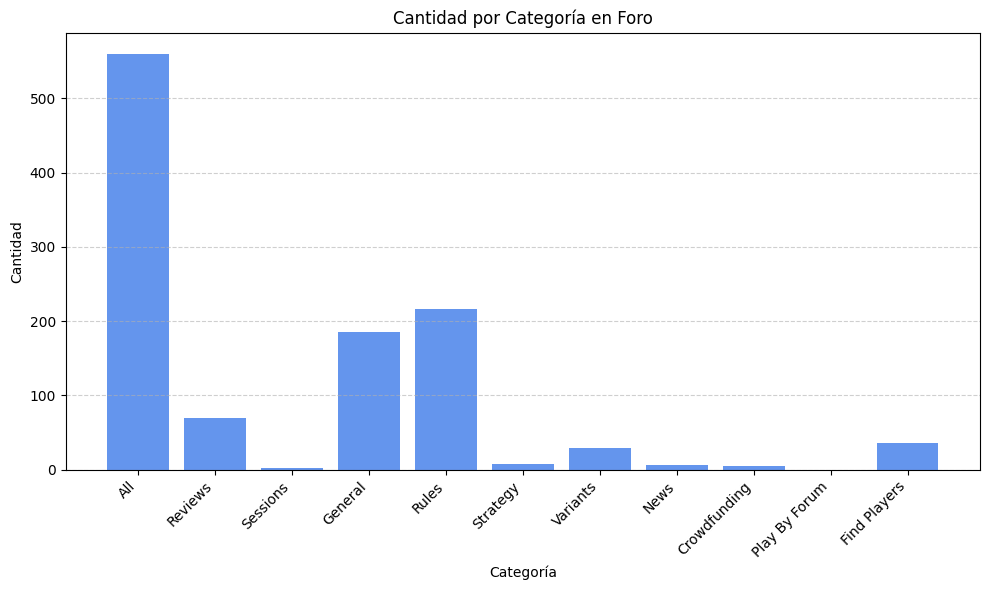

In [18]:
# Eliminar duplicados basados solo en la primera columna
df_est_foro = df_est_foro.drop_duplicates(subset=df_est_foro.columns[0])

# Asegurarse de que la columna 'Cantidad' sea numérica
df_est_foro['Cantidad'] = pd.to_numeric(df_est_foro['Cantidad'], errors='coerce')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_est_foro.iloc[:, 0], df_est_foro['Cantidad'], color='cornflowerblue')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad por Categoría en Foro')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## **ESTADISTICA:** DISEÑADOR

In [19]:
def estadisticas_dis(url):
    '''
    Extrae categorías del foro desde una página web usando Selenium,
    y devuelve una lista de diccionarios con el nombre de la categoría y su cantidad.
    '''
    chrome_options = Options()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    chrome_options.add_argument('--disable-gpu')

    # Configurar la ruta del driver
    service = Service('/usr/bin/chromedriver')
    driver = webdriver.Chrome(options=chrome_options)

    driver.get(url)

    resultados = []

    try:
        driver.get(url)

        # Esperar a que se cargue la lista de categorías del foro
        WebDriverWait(driver, 10).until(
            EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'ul.nav.nav-pills.nav-stacked li'))
        )

        items = driver.find_elements(By.CSS_SELECTOR, 'ul.nav.nav-pills.nav-stacked li')

        for item in items:
            try:
                nombre = item.find_element(By.CSS_SELECTOR, 'span.nav-pills-heading').text.strip()
                cantidad = item.find_element(By.CSS_SELECTOR, 'span.nav-pills-count').text.strip()
                resultados.append({'Categoria': nombre, 'Cantidad': cantidad})
            except Exception:
                continue

    except Exception as e:
        print(f"Error al obtener categorías del foro: {e}")

    finally:
        driver.quit()

    return resultados


In [20]:
# Ejecutamos la recolección de datos
url_stats = 'https://boardgamegeek.com/boardgamedesigner/122804/randy-flynn/linkeditems/boardgamedesigner'
est_dis = estadisticas_dis(url_stats)

In [21]:
# Observamos las estadisticas del diseñador
print("ESTADISTICAS DEL DISEÑADOR")

df_est_diseñador = pd.DataFrame(est_dis)
print("Cantidad de estadísticas: ", df_est_diseñador.shape[0])
df_est_diseñador

ESTADISTICAS DEL DISEÑADOR
Cantidad de estadísticas:  6


,Categoria,Cantidad
0,Designer,11
1,Solo Designer,2
2,Developer,6
3,Graphic Designer,3
4,Editor,3
5,Honored Designs,2


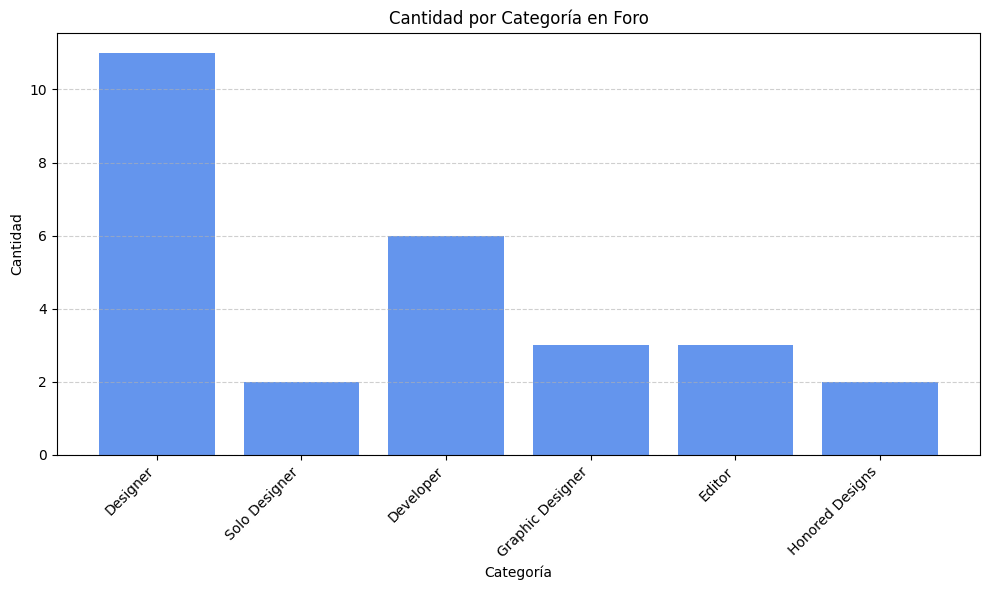

In [22]:
# Asegurarse de que la columna 'Cantidad' sea numérica
df_est_diseñador['Cantidad'] = pd.to_numeric(df_est_diseñador['Cantidad'], errors='coerce')

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(df_est_diseñador.iloc[:, 0], df_est_diseñador['Cantidad'], color='cornflowerblue')
plt.xlabel('Categoría')
plt.ylabel('Cantidad')
plt.title('Cantidad por Categoría en Foro')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

## TOTAL ESTADISTICAS OBTENIDAS

In [23]:
# Total de estadísticas
est = df_est_juego.shape[0] + df_est_ratings.shape[0] + df_est_foro.shape[0] + df_est_diseñador.shape[0]
print("Cantidad de estadísticas: ", est)

Cantidad de estadísticas:  46


## EXPORTACION A CSV

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
import os

# Definí el path donde querés guardar los archivos
carpeta_destino = "/content/drive/MyDrive/TUIA/NLP/NLP_CASCADIA/datos/estadísticas"

# Guardar los DataFrames como CSV
df_est_juego.to_csv(os.path.join(carpeta_destino, 'df_est_juego.csv'), index=False)
df_est_ratings.to_csv(os.path.join(carpeta_destino, 'df_est_ratings.csv'), index=False)
df_est_foro.to_csv(os.path.join(carpeta_destino, 'df_est_foro.csv'), index=False)
df_est_diseñador.to_csv(os.path.join(carpeta_destino, 'df_est_diseñador.csv'), index=False)

print(f"CSV exportados correctamente a: {carpeta_destino}")

CSV exportados correctamente a: /content/drive/MyDrive/TUIA/NLP/NLP_CASCADIA/datos/estadísticas
